In [1]:
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader
from tb_PulseAmpFitter import PulseAmpFitter

%matplotlib inline
dataDir = "../data/eventFeatures"

Welcome to JupyROOT 6.16/00


In [9]:
run,backend, channel="222","ubcm",2
#run,backend, channel = "237","ubcm",0
rd = EventFeaturesReader(dataDir,"000"+run,backend)

# 1. Fit Data

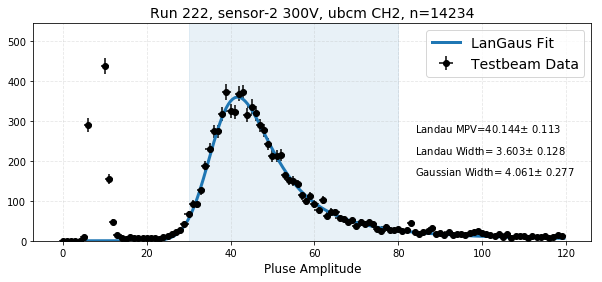

 FCN=26.1458 FROM MIGRAD    STATUS=CONVERGED     469 CALLS         470 TOTAL
                     EDM=2.44086e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   3.60288e+00   1.27801e-01   2.73135e-04  -2.49341e-04
   2  LandauMPV    4.01442e+01   1.12602e-01   3.90610e-04   5.77130e-06
   3  Normalisation   2.17788e+03   1.54178e+02   8.76556e-02  -4.69168e-07
   4  GaussianSigma   4.06075e+00   2.77321e-01   1.64433e-04  -1.96199e-04
                               ERR DEF= 0.5


In [10]:
ch = rd.getChannel(channel)
title = "Run {}, sensor-{} {}V, {} CH{}, n={}".format(run,2, 300,backend,channel,len(ch))
# fitting
fitter = PulseAmpFitter(ch.pulseAmp)
sigma = ch.baseline_std.mean()
fitter.fitRange(30,80,None)
# plot
fitter.plot()
plt.title(title, fontsize=14)
#plt.savefig("../plots/pulseAmpFit/langaus_{}_run{}_{}.png".format(backend,run,channel),dpi=300)

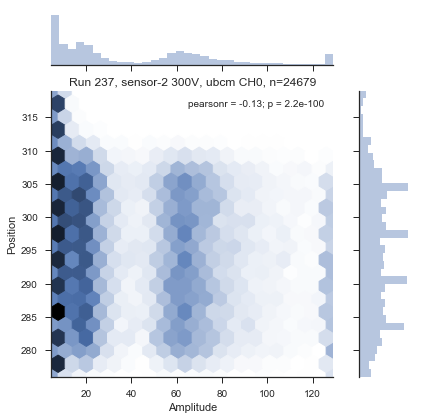

In [16]:
import seaborn as sns
sns.set(style="ticks")
jp= sns.jointplot(ch.pulseAmp, ch.pulsePos, kind="hex", color="C0",gridsize=20,ratio=4,space=0.5)
jp.set_axis_labels(r'Amplitude','Position')
#jp.ax_joint.plot([0,100])
jp.ax_joint.set_title(title)
#plt.savefig("../plots/PulseHist2D/{}_run{}_{}.png".format(backend,run,channel),dpi=300)